<a href="https://colab.research.google.com/github/bibidemarezoyens/LB/blob/main/plotjes_voor_rowrowrow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
complete_df = pd.read_csv('ploeg_final_df.csv')
print(complete_df.head())

   ervaring  500_split  2k tijd  binary_trainingtype  binary_geslacht  \
0         1      104.6    379.9                    0                0   
1         1      104.7    379.9                    0                0   
2         1      104.3    379.9                    0                0   
3         1      104.0    379.9                    0                0   
4         1      104.1    379.9                    0                0   

   binary_gewichtsklasse  binary_ploeg  
0                      1             0  
1                      1             0  
2                      1             0  
3                      1             0  
4                      1             0  


/tmp/ipykernel_8393/2342326484.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.kdeplot(data=complete_df[complete_df['binary_geslacht'] == 0][complete_df['binary_gewichtsklasse'] == 1]['500_split'],
/tmp/ipykernel_8393/2342326484.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.kdeplot(data=complete_df[complete_df['binary_geslacht'] == 0][complete_df['binary_gewichtsklasse'] == 0]['500_split'],
/tmp/ipykernel_8393/2342326484.py:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.kdeplot(data=complete_df[complete_df['binary_geslacht'] == 1][complete_df['binary_gewichtsklasse'] == 1]['500_split'],
/tmp/ipykernel_8393/2342326484.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.kdeplot(data=complete_df[complete_df['binary_geslacht'] == 1][complete_df['binary_gewichtsklasse'] == 0]['500_split'],


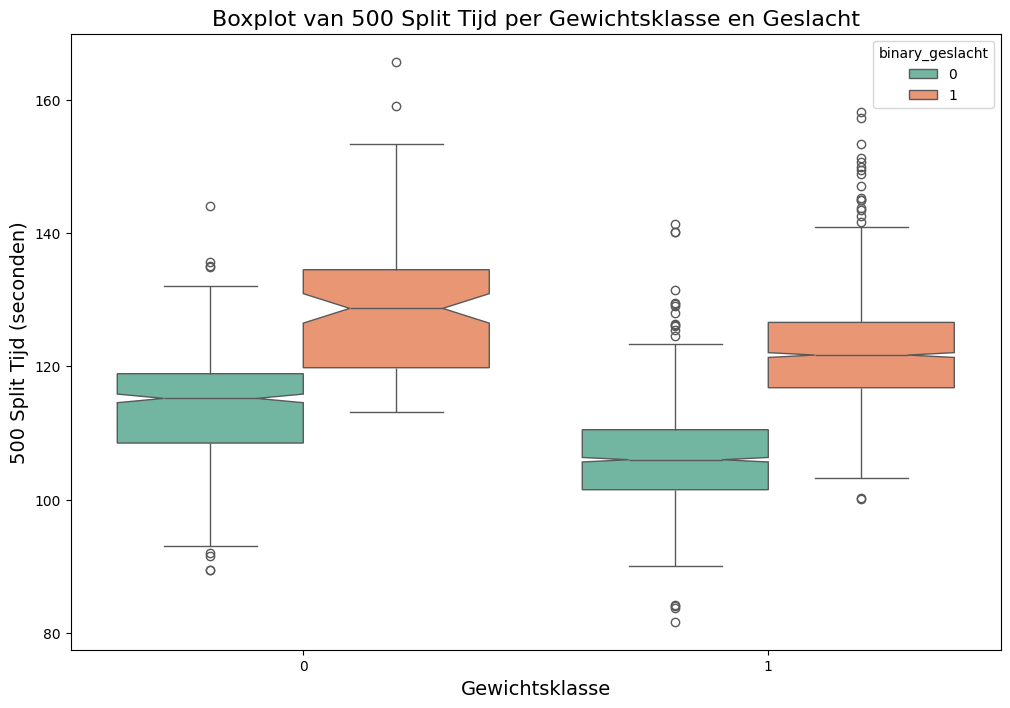

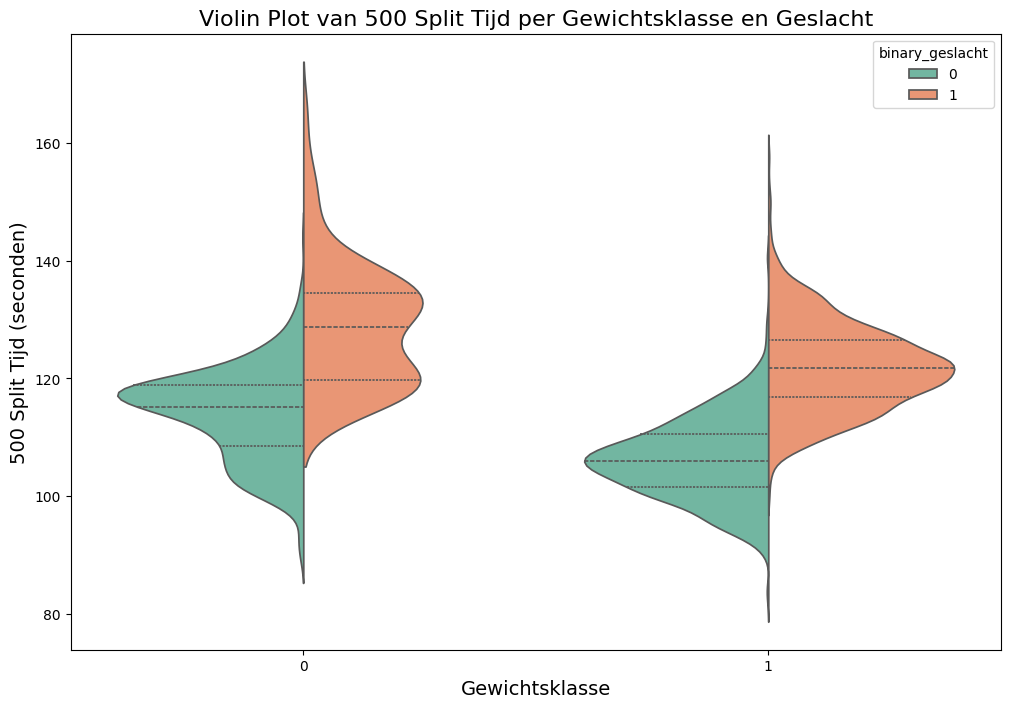

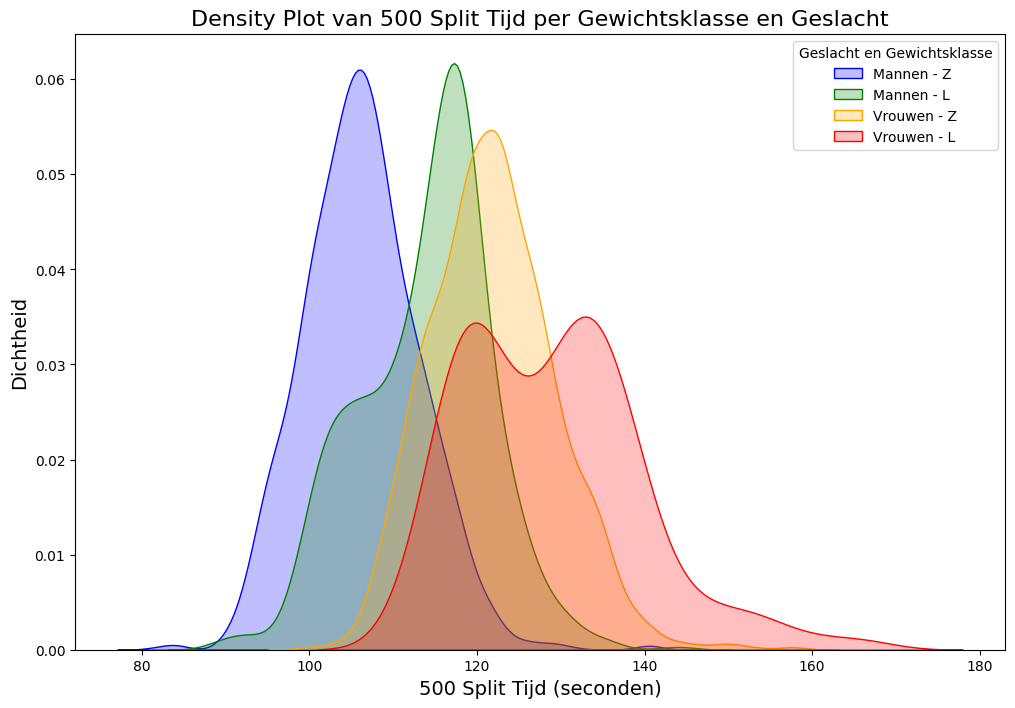

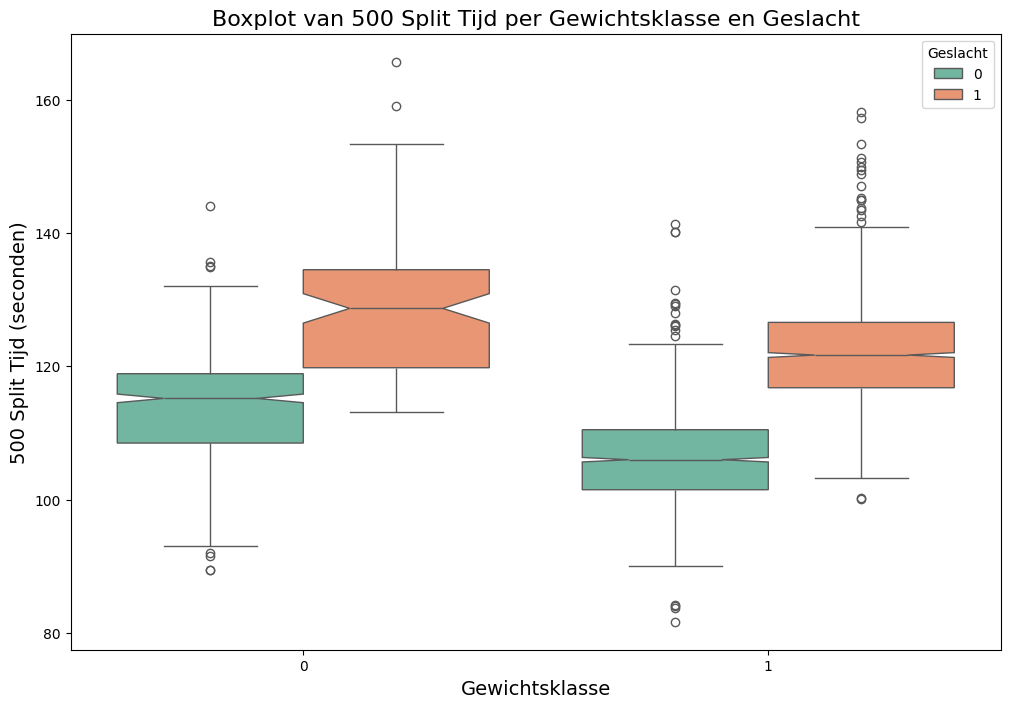

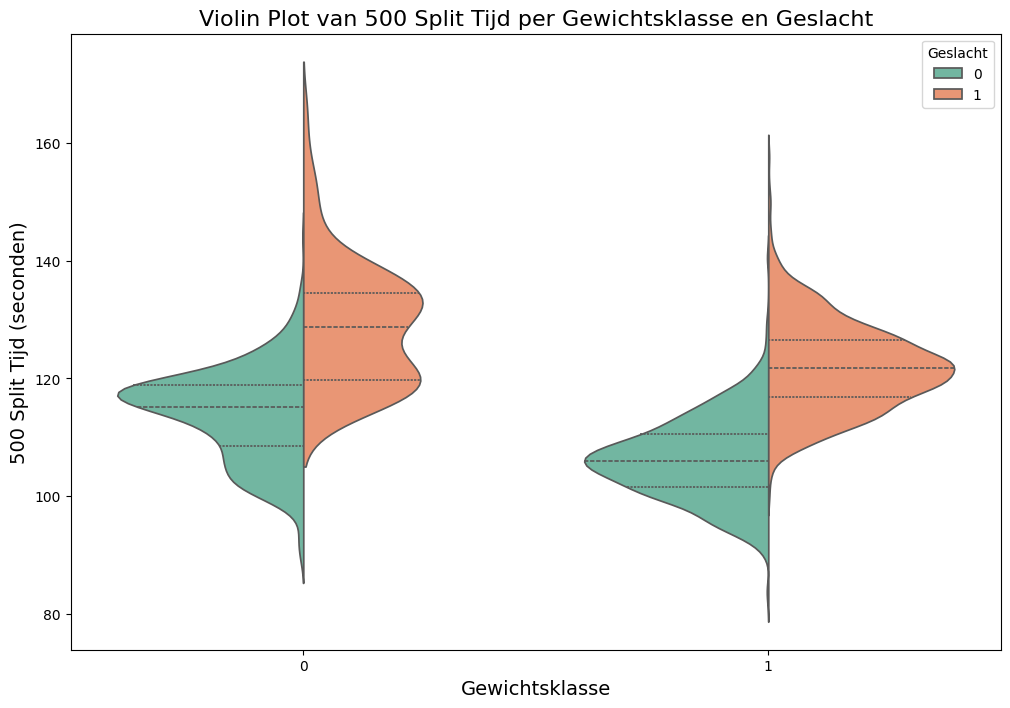

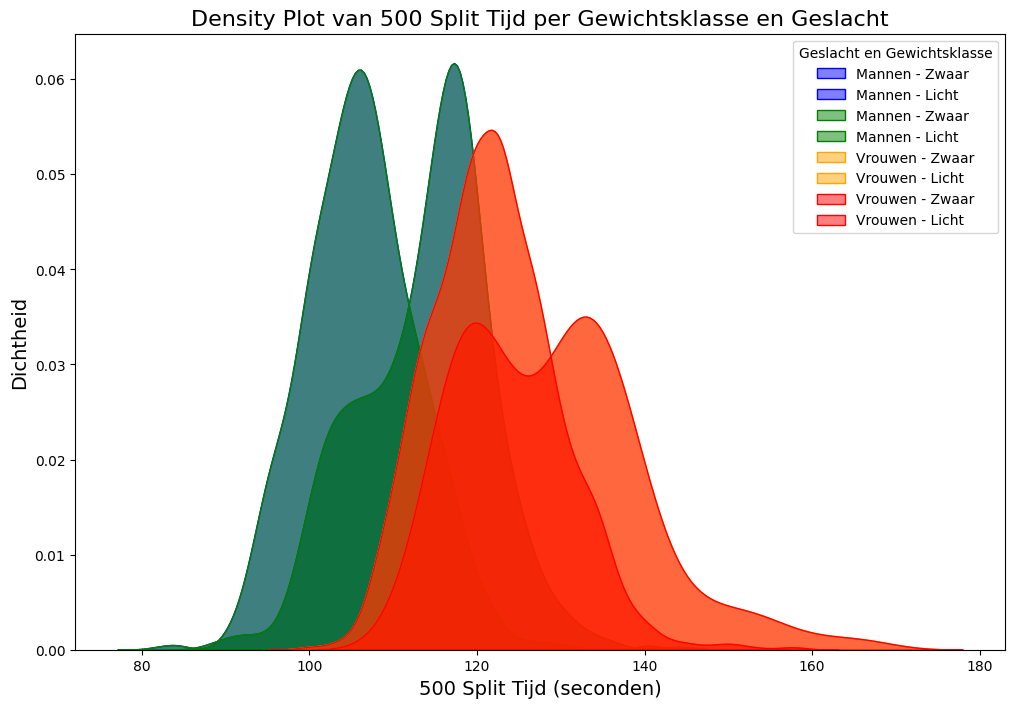

Geslacht: 0, Gewichtsklasse: 1, Aantal records: 1752
Geslacht: 0, Gewichtsklasse: 0, Aantal records: 639
Geslacht: 0, Gewichtsklasse: 1, Aantal records: 1752
Geslacht: 0, Gewichtsklasse: 0, Aantal records: 639
Geslacht: 1, Gewichtsklasse: 1, Aantal records: 1814
Geslacht: 1, Gewichtsklasse: 0, Aantal records: 109
Geslacht: 1, Gewichtsklasse: 1, Aantal records: 1814
Geslacht: 1, Gewichtsklasse: 0, Aantal records: 109


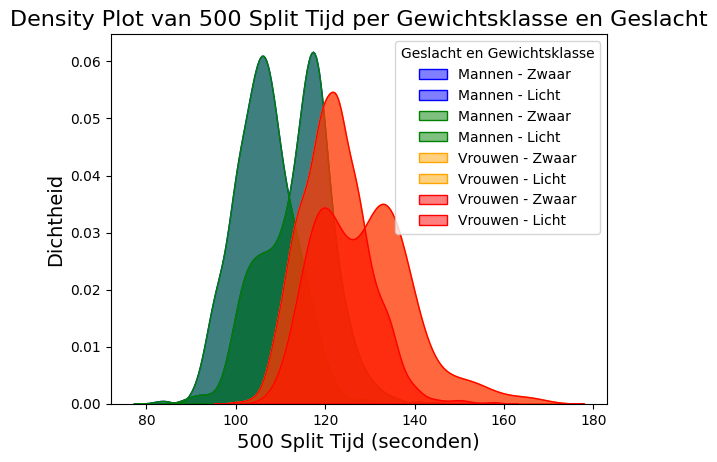

Dataset after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4314 entries, 0 to 4313
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ervaring               4314 non-null   int64  
 1   500_split              4314 non-null   float64
 2   2k tijd                4314 non-null   float64
 3   binary_trainingtype    4314 non-null   int64  
 4   binary_geslacht        4314 non-null   int64  
 5   binary_gewichtsklasse  4314 non-null   int64  
 6   binary_ploeg           4314 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 236.1 KB
None
   ervaring  500_split  2k tijd  binary_trainingtype  binary_geslacht  \
0         1      104.6    379.9                    0                0   
1         1      104.7    379.9                    0                0   
2         1      104.3    379.9                    0                0   
3         1      104.0    379.9                    0 

In [37]:
# Zet de '500_split' kolom om naar numerieke waarden, vervang ongeldige waarden door NaN
complete_df['500_split'] = pd.to_numeric(complete_df['500_split'], errors='coerce')

#Verwijder rijen waar '500_split' NaN is
groot_dataframe_op_sec = complete_df.dropna(subset=['500_split'])

# BOXPLOT
plt.figure(figsize=(12, 8))

# Maak de boxplot met de gefilterde data voor Z en L per geslacht
sns.boxplot(x='binary_gewichtsklasse', y='500_split', hue='binary_geslacht', data=complete_df,
            palette='Set2', notch=True)

# Voeg titels en labels toe voor de boxplot
plt.title("Boxplot van 500 Split Tijd per Gewichtsklasse en Geslacht", fontsize=16)
plt.xlabel("Gewichtsklasse", fontsize=14)
plt.ylabel("500 Split Tijd (seconden)", fontsize=14)


# VIOLIN PLOT
plt.figure(figsize=(12, 8))

# Maak de violin plot voor de 500_split tijden per geslacht en gewichtsklasse
sns.violinplot(x='binary_gewichtsklasse', y='500_split', hue='binary_geslacht', data=complete_df,
               inner='quart', palette='Set2', split=True)

plt.title("Violin Plot van 500 Split Tijd per Gewichtsklasse en Geslacht", fontsize=16)
plt.xlabel("Gewichtsklasse", fontsize=14)
plt.ylabel("500 Split Tijd (seconden)", fontsize=14)


# DENSITY PLOT
plt.figure(figsize=(12, 8))

# Maak de density plot voor de 500_split tijden per geslacht en gewichtsklasse
sns.kdeplot(data=complete_df[complete_df['binary_geslacht'] == 0][complete_df['binary_gewichtsklasse'] == 1]['500_split'],
            label='Mannen - Z', fill=True, color='blue')
sns.kdeplot(data=complete_df[complete_df['binary_geslacht'] == 0][complete_df['binary_gewichtsklasse'] == 0]['500_split'],
            label='Mannen - L', fill=True, color='green')
sns.kdeplot(data=complete_df[complete_df['binary_geslacht'] == 1][complete_df['binary_gewichtsklasse'] == 1]['500_split'],
            label='Vrouwen - Z', fill=True, color='orange')
sns.kdeplot(data=complete_df[complete_df['binary_geslacht'] == 1][complete_df['binary_gewichtsklasse'] == 0]['500_split'],
            label='Vrouwen - L', fill=True, color='red')

plt.title("Density Plot van 500 Split Tijd per Gewichtsklasse en Geslacht", fontsize=16)
plt.xlabel("500 Split Tijd (seconden)", fontsize=14)
plt.ylabel("Dichtheid", fontsize=14)

# Voeg een legenda toe
plt.legend(title="Geslacht en Gewichtsklasse")

# Toon de density plot
plt.show()

# ========== BOXPLOT ==========
plt.figure(figsize=(12, 8))

sns.boxplot(x='binary_gewichtsklasse', 
            y='500_split', 
            hue='binary_geslacht', 
            data=complete_df, 
            palette='Set2', 
            notch=True)

plt.title("Boxplot van 500 Split Tijd per Gewichtsklasse en Geslacht", fontsize=16)
plt.xlabel("Gewichtsklasse", fontsize=14)
plt.ylabel("500 Split Tijd (seconden)", fontsize=14)
plt.legend(title="Geslacht")
plt.show()

# ========== VIOLIN PLOT ==========
plt.figure(figsize=(12, 8))

sns.violinplot(x='binary_gewichtsklasse', 
               y='500_split', 
               hue='binary_geslacht', 
               data=complete_df, 
               inner='quart', 
               palette='Set2', 
               split=True)

plt.title("Violin Plot van 500 Split Tijd per Gewichtsklasse en Geslacht", fontsize=16)
plt.xlabel("Gewichtsklasse", fontsize=14)
plt.ylabel("500 Split Tijd (seconden)", fontsize=14)
plt.legend(title="Geslacht")
plt.show()

# ========== DENSITY PLOT ==========
plt.figure(figsize=(12, 8))

# Maak de density plot voor de 500_split tijden per geslacht en gewichtsklasse
for geslacht, kleur in zip([0, 0, 1, 1], ['blue', 'green', 'orange', 'red']):
    for gewichtsklasse in [1, 0]:
        subset = complete_df[(complete_df['binary_geslacht'] == geslacht) & 
                                        (complete_df['binary_gewichtsklasse'] == gewichtsklasse)]
        if not subset.empty:
            label = f"{'Mannen' if geslacht == 0 else 'Vrouwen'} - {'Zwaar' if gewichtsklasse == 1 else 'Licht'}"
            sns.kdeplot(data=subset['500_split'], label=label, fill=True, color=kleur, alpha=0.5)

plt.title("Density Plot van 500 Split Tijd per Gewichtsklasse en Geslacht", fontsize=16)
plt.xlabel("500 Split Tijd (seconden)", fontsize=14)
plt.ylabel("Dichtheid", fontsize=14)
plt.legend(title="Geslacht en Gewichtsklasse")
plt.show()

for geslacht, kleur in zip([0, 0, 1, 1], ['blue', 'green', 'orange', 'red']):
    for gewichtsklasse in [1, 0]:
        subset = complete_df[(complete_df['binary_geslacht'] == geslacht) & 
                                        (complete_df['binary_gewichtsklasse'] == gewichtsklasse)]
        print(f"Geslacht: {geslacht}, Gewichtsklasse: {gewichtsklasse}, Aantal records: {len(subset)}")  # Debugging line
        
        if not subset.empty:
            label = f"{'Mannen' if geslacht == 0 else 'Vrouwen'} - {'Zwaar' if gewichtsklasse == 1 else 'Licht'}"
            sns.kdeplot(data=subset['500_split'], label=label, fill=True, color=kleur, alpha=0.5)

plt.title("Density Plot van 500 Split Tijd per Gewichtsklasse en Geslacht", fontsize=16)
plt.xlabel("500 Split Tijd (seconden)", fontsize=14)
plt.ylabel("Dichtheid", fontsize=14)
plt.legend(title="Geslacht en Gewichtsklasse")
plt.show()

print("Dataset after cleaning:")
print(complete_df.info())  # Check number of non-null values
print(complete_df.head())